In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Load Clean Data

In [2]:
data = pd.read_csv('trip_Nov_1to14_clean.csv')

In [3]:
data = data.sample(n=10000, random_state=0)

## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

to_drop=['trips_pooled', 'shared_trip_authorized']

X=data.drop(to_drop, axis=1)
y=data['shared_trip_authorized']

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0, stratify = y)

X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

## Baseline

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import ShuffleSplit


# def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
#                         n_jobs=None, train_sizes=np.linspace(.0001, .001, 10)):
#     """
#     Generate 3 plots: the test and training learning curve, the training
#     samples vs fit times curve, the fit times vs score curve.

#     Parameters
#     ----------
#     estimator : object type that implements the "fit" and "predict" methods
#         An object of that type which is cloned for each validation.

#     title : string
#         Title for the chart.

#     X : array-like, shape (n_samples, n_features)
#         Training vector, where n_samples is the number of samples and
#         n_features is the number of features.

#     y : array-like, shape (n_samples) or (n_samples, n_features), optional
#         Target relative to X for classification or regression;
#         None for unsupervised learning.

#     axes : array of 3 axes, optional (default=None)
#         Axes to use for plotting the curves.

#     ylim : tuple, shape (ymin, ymax), optional
#         Defines minimum and maximum yvalues plotted.

#     cv : int, cross-validation generator or an iterable, optional
#         Determines the cross-validation splitting strategy.
#         Possible inputs for cv are:

#           - None, to use the default 5-fold cross-validation,
#           - integer, to specify the number of folds.
#           - :term:`CV splitter`,
#           - An iterable yielding (train, test) splits as arrays of indices.

#         For integer/None inputs, if ``y`` is binary or multiclass,
#         :class:`StratifiedKFold` used. If the estimator is not a classifier
#         or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

#         Refer :ref:`User Guide <cross_validation>` for the various
#         cross-validators that can be used here.

#     n_jobs : int or None, optional (default=None)
#         Number of jobs to run in parallel.
#         ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
#         ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
#         for more details.

#     train_sizes : array-like, shape (n_ticks,), dtype float or int
#         Relative or absolute numbers of training examples that will be used to
#         generate the learning curve. If the dtype is float, it is regarded as a
#         fraction of the maximum size of the training set (that is determined
#         by the selected validation method), i.e. it has to be within (0, 1].
#         Otherwise it is interpreted as absolute sizes of the training sets.
#         Note that for classification the number of samples usually have to
#         be big enough to contain at least one sample from each class.
#         (default: np.linspace(0.1, 1.0, 5))
#     """
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")

#     train_sizes, train_scores, test_scores, fit_times, _ = \
#         learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
#                        train_sizes=train_sizes,
#                        return_times=True)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)

#     # Plot learning curve
#     axes[0].grid()
#     axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
#                          train_scores_mean + train_scores_std, alpha=0.1,
#                          color="r")
#     axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1,
#                          color="g")
#     axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
#                  label="Training score")
#     axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
#                  label="Cross-validation score")
#     axes[0].legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

#     return plt


# fig, axes = plt.subplots(3, 2, figsize=(10, 15))


# title = "Learning Curves (RandomForest Classifier)"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)

# estimator = RandomForestClassifier()
# plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)

# title = "Learning Curves (GradientBoostingClassifier)"
# cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
# estimator = GradientBoostingClassifier()
# plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)



# plt.show()

In [6]:
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss


dummy = DummyClassifier(strategy='most_frequent', random_state=0).fit(X_train, y_train)

dummy_pred=dummy.predict(X_test)
dummy_probs = dummy.predict_proba(X_test)

print('log_loss:', log_loss(y_test, dummy_probs))
print('--'*12)
print('train score accuracy', dummy.score(X_train, y_train))
print('test score accuracy', dummy.score(X_val, y_val))
print('--'*12)

print('train score precision', precision_score(y_val, dummy_pred))
print('test score precision', precision_score(y_val, dummy_pred))
print('--'*12)
print('train score recall', recall_score(y_val, dummy_pred))
print('test score recall', recall_score(y_val, dummy_pred))
print('--'*12)
print('\n')
print(classification_report(y_val, dummy_pred, labels=[0, 1]))



log_loss: 3.789397181613058
------------------------
train score accuracy 0.8925714285714286
test score accuracy 0.8948571428571429
------------------------
train score precision 0.0
test score precision 0.0
------------------------
train score recall 0.0
test score recall 0.0
------------------------


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3132
           1       0.00      0.00      0.00       368

    accuracy                           0.89      3500
   macro avg       0.45      0.50      0.47      3500
weighted avg       0.80      0.89      0.85      3500



/Users/elhamamini/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elhamamini/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss





rf = RandomForestClassifier(max_depth=7).fit(X_train, y_train)
rf_pred=rf.predict(X_val)
rf_probs = rf.predict_proba(X_val)

print('log_loss:', log_loss(y_test, rf_probs))
print('--'*12)
print('train score accuracy', rf.score(X_train, y_train))
print('test score accuracy', rf.score(X_val, y_val))
print('--'*12)

print('train score precision', precision_score(y_val, rf_pred))
print('test score precision', precision_score(y_val, rf_pred))
print('--'*12)
print('train score recall', recall_score(y_val, rf_pred))
print('test score recall', recall_score(y_val, rf_pred))
print('--'*12)
print('\n')
print(classification_report(y_val, rf_pred, labels=[0, 1]))

log_loss: 0.4744675393660643
------------------------
train score accuracy 0.9634285714285714
test score accuracy 0.964
------------------------
train score precision 1.0
test score precision 1.0
------------------------
train score recall 0.657608695652174
test score recall 0.657608695652174
------------------------


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3132
           1       1.00      0.66      0.79       368

    accuracy                           0.96      3500
   macro avg       0.98      0.83      0.89      3500
weighted avg       0.97      0.96      0.96      3500



<AxesSubplot:>

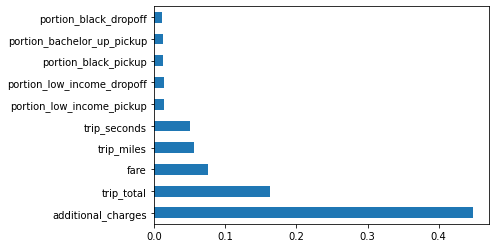

In [9]:
from sklearn.inspection import permutation_importance

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')


## Cross Validation

In [10]:
import pandas as pd
import numpy as np 
import random

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

import joblib

In [11]:
trip_small = data.sample(n=10000, random_state=0)

In [12]:
from sklearn.model_selection import train_test_split

to_drop=['trips_pooled', 'shared_trip_authorized']

X=trip_small.drop(to_drop, axis=1)
y=trip_small['shared_trip_authorized']

from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=5).fit_transform(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.3, random_state=0, stratify = y)

X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

In [14]:
from sklearn.ensemble import RandomForestClassifier
scoring = ['precision','f1', 'recall']



rf = RandomForestClassifier()

parameters = {
    'n_estimators': [5, 10, 50, 100, 200],
    'max_depth': [1, 2, 3, 5],
    'n_jobs': [-1, 0, 1],
    'max_features':[1,2,3,4,5]
    
}

cv = GridSearchCV(rf, parameters, cv=5, refit='recall', scoring=scoring)
cv.fit(X_train,y_train)
print(cv.best_estimator_)
joblib.dump(cv.best_estimator_, 'models/rf_model.pkl')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


['models/rf_model.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
scoring = ['precision','f1', 'recall']

lr = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', n_jobs=-1)

parameters = {
    'C': [0.1, 1]
}


cv = GridSearchCV(lr, parameters, cv=5, refit='recall', scoring=scoring)
cv.fit(X_train,y_train)
print(cv.best_estimator_)
joblib.dump(cv.best_estimator_, 'models/lr_model.pkl')

In [ ]:
from sklearn.svm import SVC
scoring = ['precision','f1', 'recall']
svc = SVC()

parameters = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10]
}


cv = GridSearchCV(svc, parameters, cv=5,refit='recall', scoring=scoring )
cv.fit(X_train,y_train)
print(cv.best_estimator_)
joblib.dump(cv.best_estimator_, 'models/svc_model.pkl')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
scoring = ['precision','f1', 'recall']

gb = GradientBoostingClassifier()

parameters = {
    'n_estimators': [50, 100],
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.1, 1]
}

cv = GridSearchCV(gb, parameters, cv=5, refit='recall', scoring=scoring )
cv.fit(X_train,y_train)
print(cv.best_estimator_)
joblib.dump(cv.best_estimator_, 'models/gb_model.pkl')

## Model Selection

In [ ]:
models = {}
for mdl in ['rf', 'lr', 'svc','gb']:
    models[mdl] = joblib.load(f'clean_data/models/{mdl}_model.pkl')

In [ ]:
import numpy as np
from time import time

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss


def evaluate_model(name, model, X_val, y_val):
    start = time()
    
    pred = model.predict(X_val)
    #probs = model.predict_proba(X_val)
    
    #log_loss_score = log_loss(y_val, probs)
    accuracy = model.score(X_val, y_val)
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    f1 = f1_score(y_val, pred, average='weighted')
    end = time()
    
    #print(f'{name} -- log_loss: {log_loss_score} Latency: {round(end-start, 2)}')
    print(f'{name} -- accuracy: {accuracy} Latency: {round(end-start, 2)}')
    print(f'{name} -- precision: {precision} Latency: {round(end-start, 2)}')
    print(f'{name} -- recall: {recall} Latency: {round(end-start, 2)}')
    print(f'{name} -- f1_score: {f1} Latency: {round(end-start, 2)}')
    
    print('--'*12)

In [ ]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

## Final Model

In [ ]:
evaluate_model('gb', models['gb'], X_test, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
percision_point = 0.75
fpr_point = 0.16
from sklearn.metrics import precision_recall_curve, roc_curve, auc

y_lr = GradientBoostingClassifier(max_depth=7,learning_rate=0.1, n_estimators=100).fit(X_train, y_train).decision_function(X_test)
    
precision, recall, thresholds = precision_recall_curve(y_test, y_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]


precision_index = np.where(np.isclose(precision, percision_point))




plt.figure(figsize=(6, 6))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
plt.savefig('images/precision_recall_curve.png')

fpr, tpr,_ = roc_curve(y_test, y_lr)
roc_auc = auc(fpr, tpr)






plt.figure(figsize=(6, 6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Gradient Boosting ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.savefig('images/roc_curve.png')
plt.show()


